In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/Rohan/Downloads/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
100*df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df =df.drop(columns=['instant'])

In [7]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
df['dteday'] =df['dteday'].apply(lambda x: int(x.split('-')[0]))
df = df.rename(columns={"dteday": "date"})

In [9]:
df.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

In [10]:
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [11]:
df['weathersit'] = df['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})

In [12]:
df['weekday']=df['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [13]:
df['mnth']=df['mnth'].map({1:'jan',2:'feb',3:'march',4:'april',5:'may',6:'june',7:'july',8:'Aug',9:'sept',10:'oct',11:'Nov',12:'Dec'})

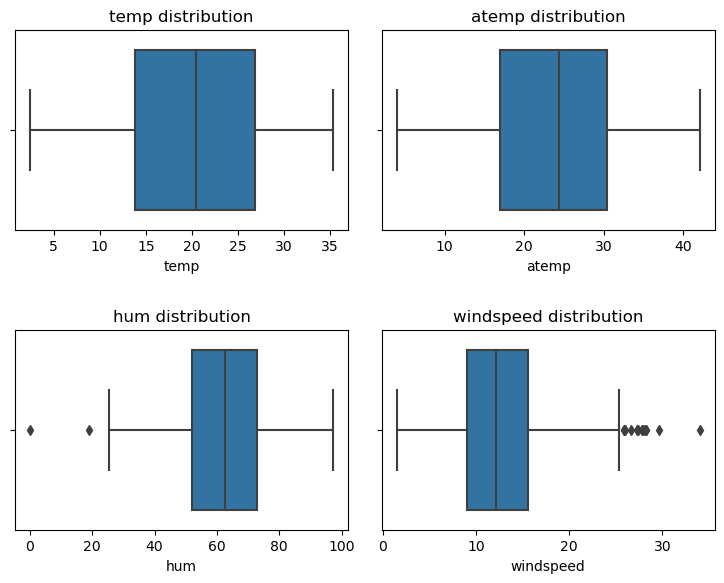

In [14]:
df_num_col=['temp','atemp','hum','windspeed']
plt.figure(figsize=(10, 10))
i=1
for col in df_num_col:
    plt.subplot(2,2,i)
    sns.boxplot(data=df, x=col)
    plt.title(col+" distribution")
    i=i+1
plt.subplots_adjust(left=0.2,bottom=0.5,right=0.9,top=1,wspace=0.1, hspace=0.5)
plt.show()

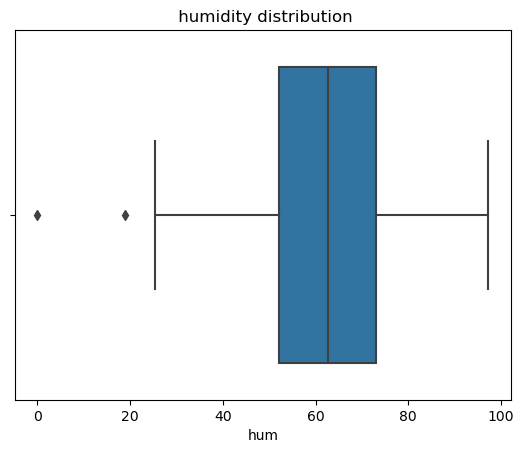

In [16]:
sns.boxplot(data=df, x='hum')
plt.title(" humidity distribution")
plt.show()

In [18]:
df[df['hum'] == 0]

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,10,spring,0,march,0,Thursday,1,light,15.952731,19.2834,0.0,17.545759,46,577,623


In [20]:
df[(df.index < (68+10)) & (df.index > (68-10))].hum

59    53.5000
60    44.9583
61    31.8333
62    61.0417
63    78.9167
64    94.8261
65    55.1304
66    42.0833
67    77.5417
68     0.0000
69    64.9565
70    59.4583
71    52.7391
72    49.6957
73    65.5652
74    77.6522
75    60.2917
76    52.5217
77    37.9167
Name: hum, dtype: float64

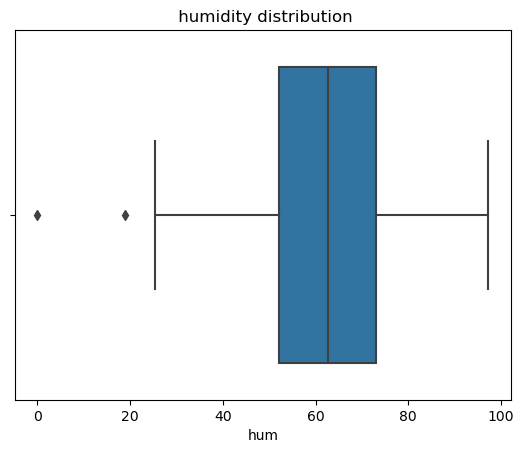

In [22]:
sns.boxplot(data=df, x='hum')
plt.title(" humidity distribution")
plt.show()

In [23]:
df_num_col=['temp','atemp','hum','windspeed','cnt']

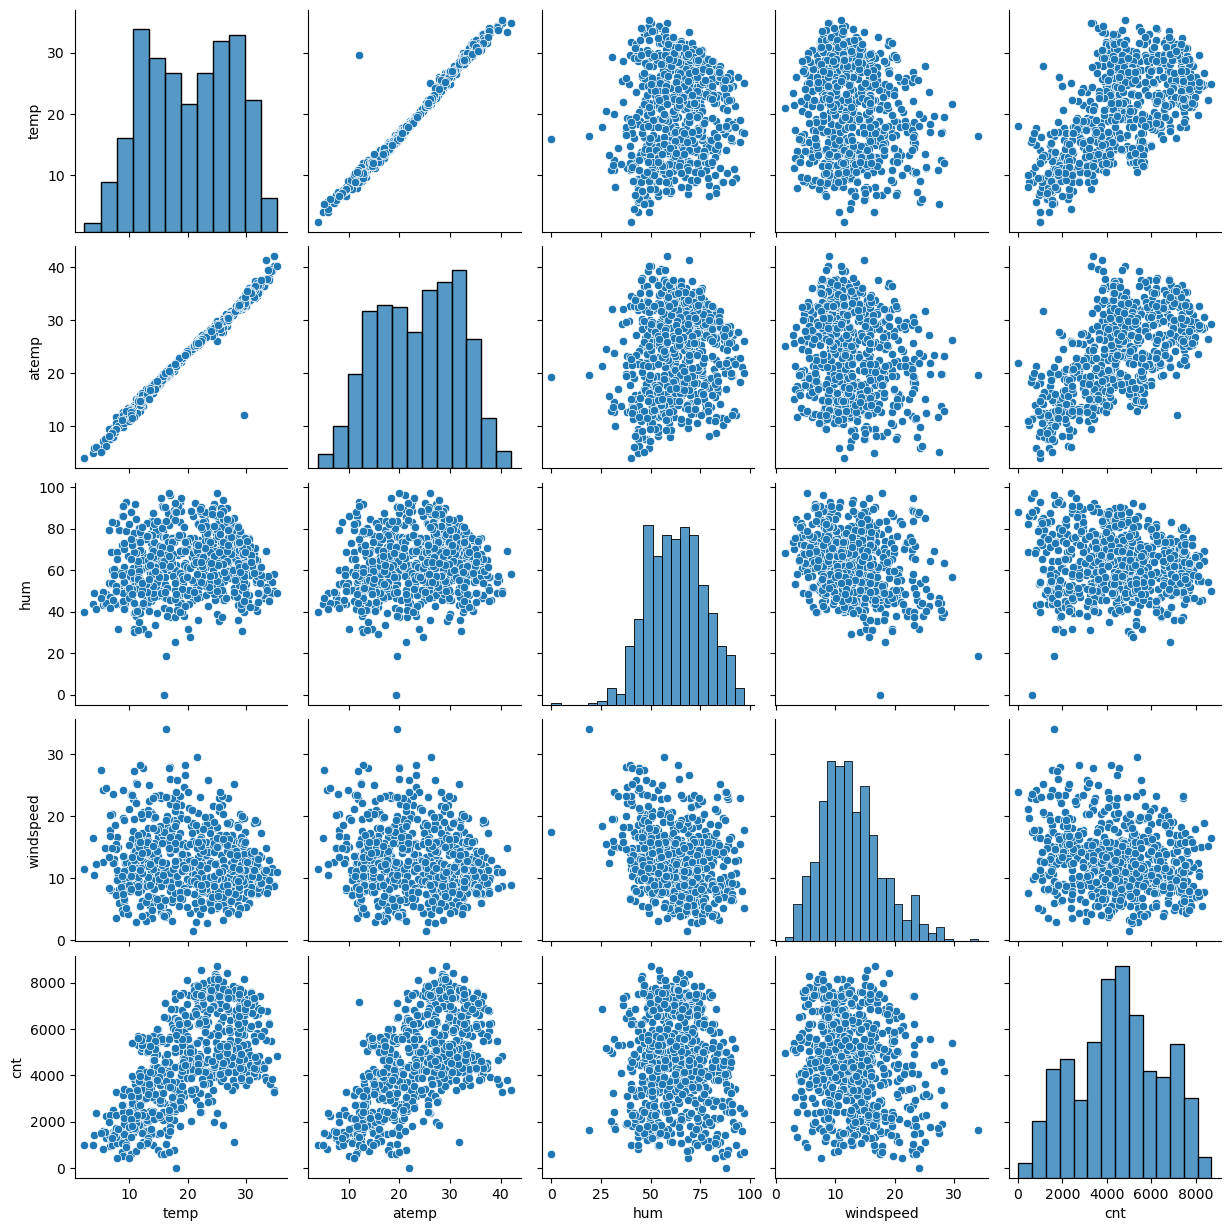

In [24]:
sns.pairplot(df,vars=df_num_col)
plt.show()

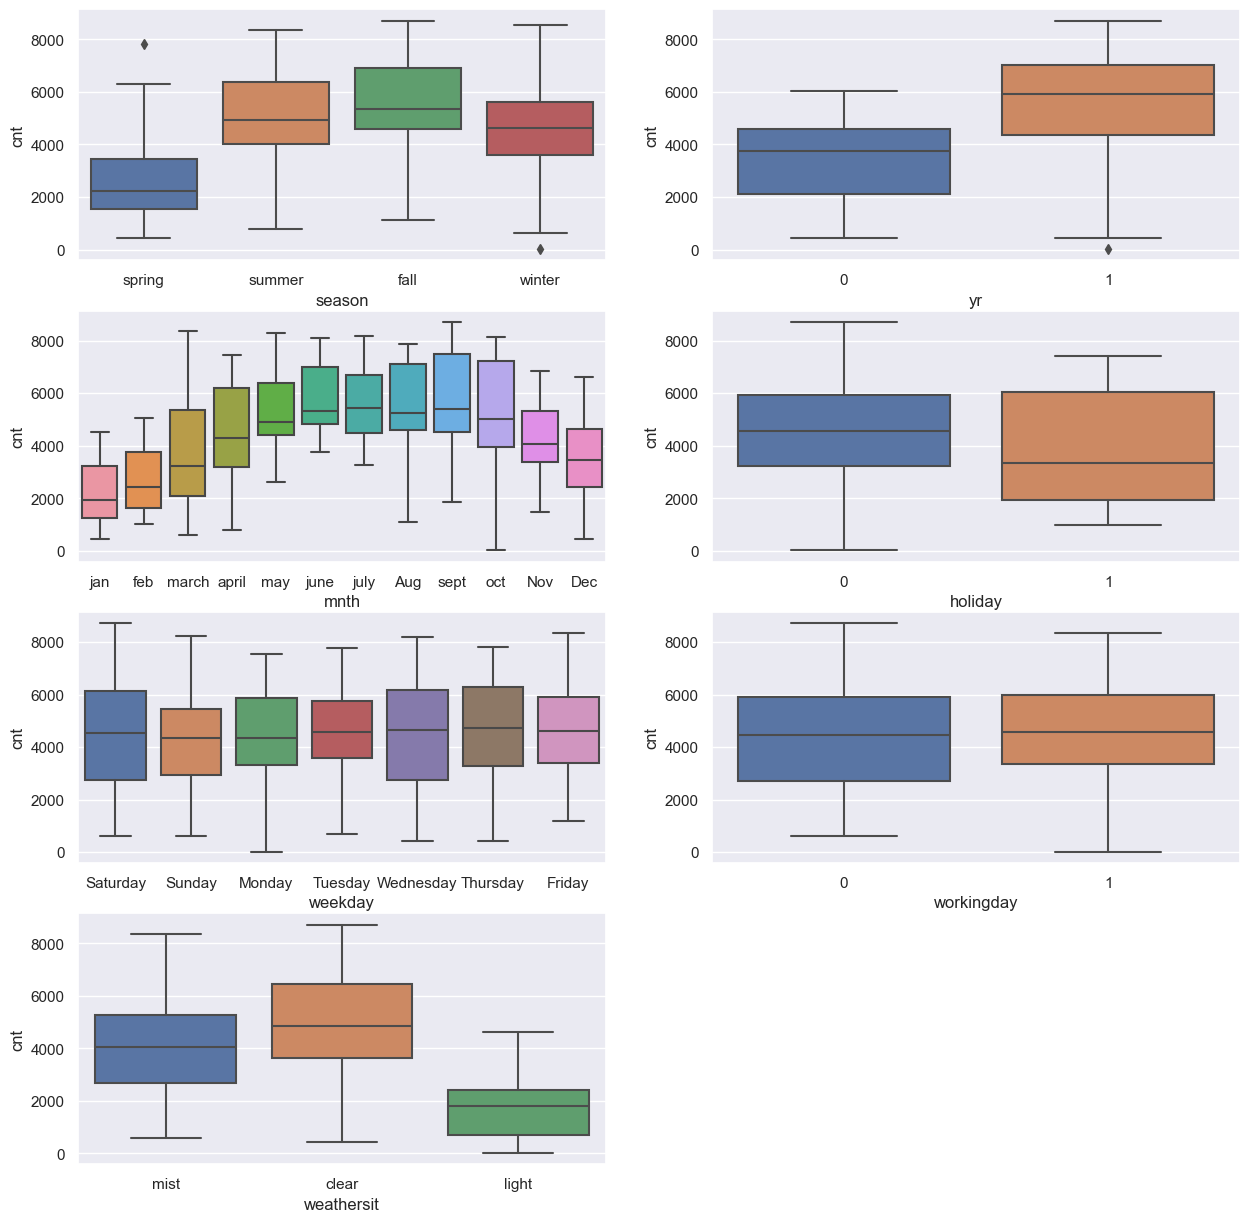

In [25]:
df_cat_col = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
sns.set(style="darkgrid")
i=1
for col in df_cat_col:
    plt.subplot(4,2,i)
    sns.boxplot(data=df, x=col, y='cnt')
    i=i+1
plt.show()

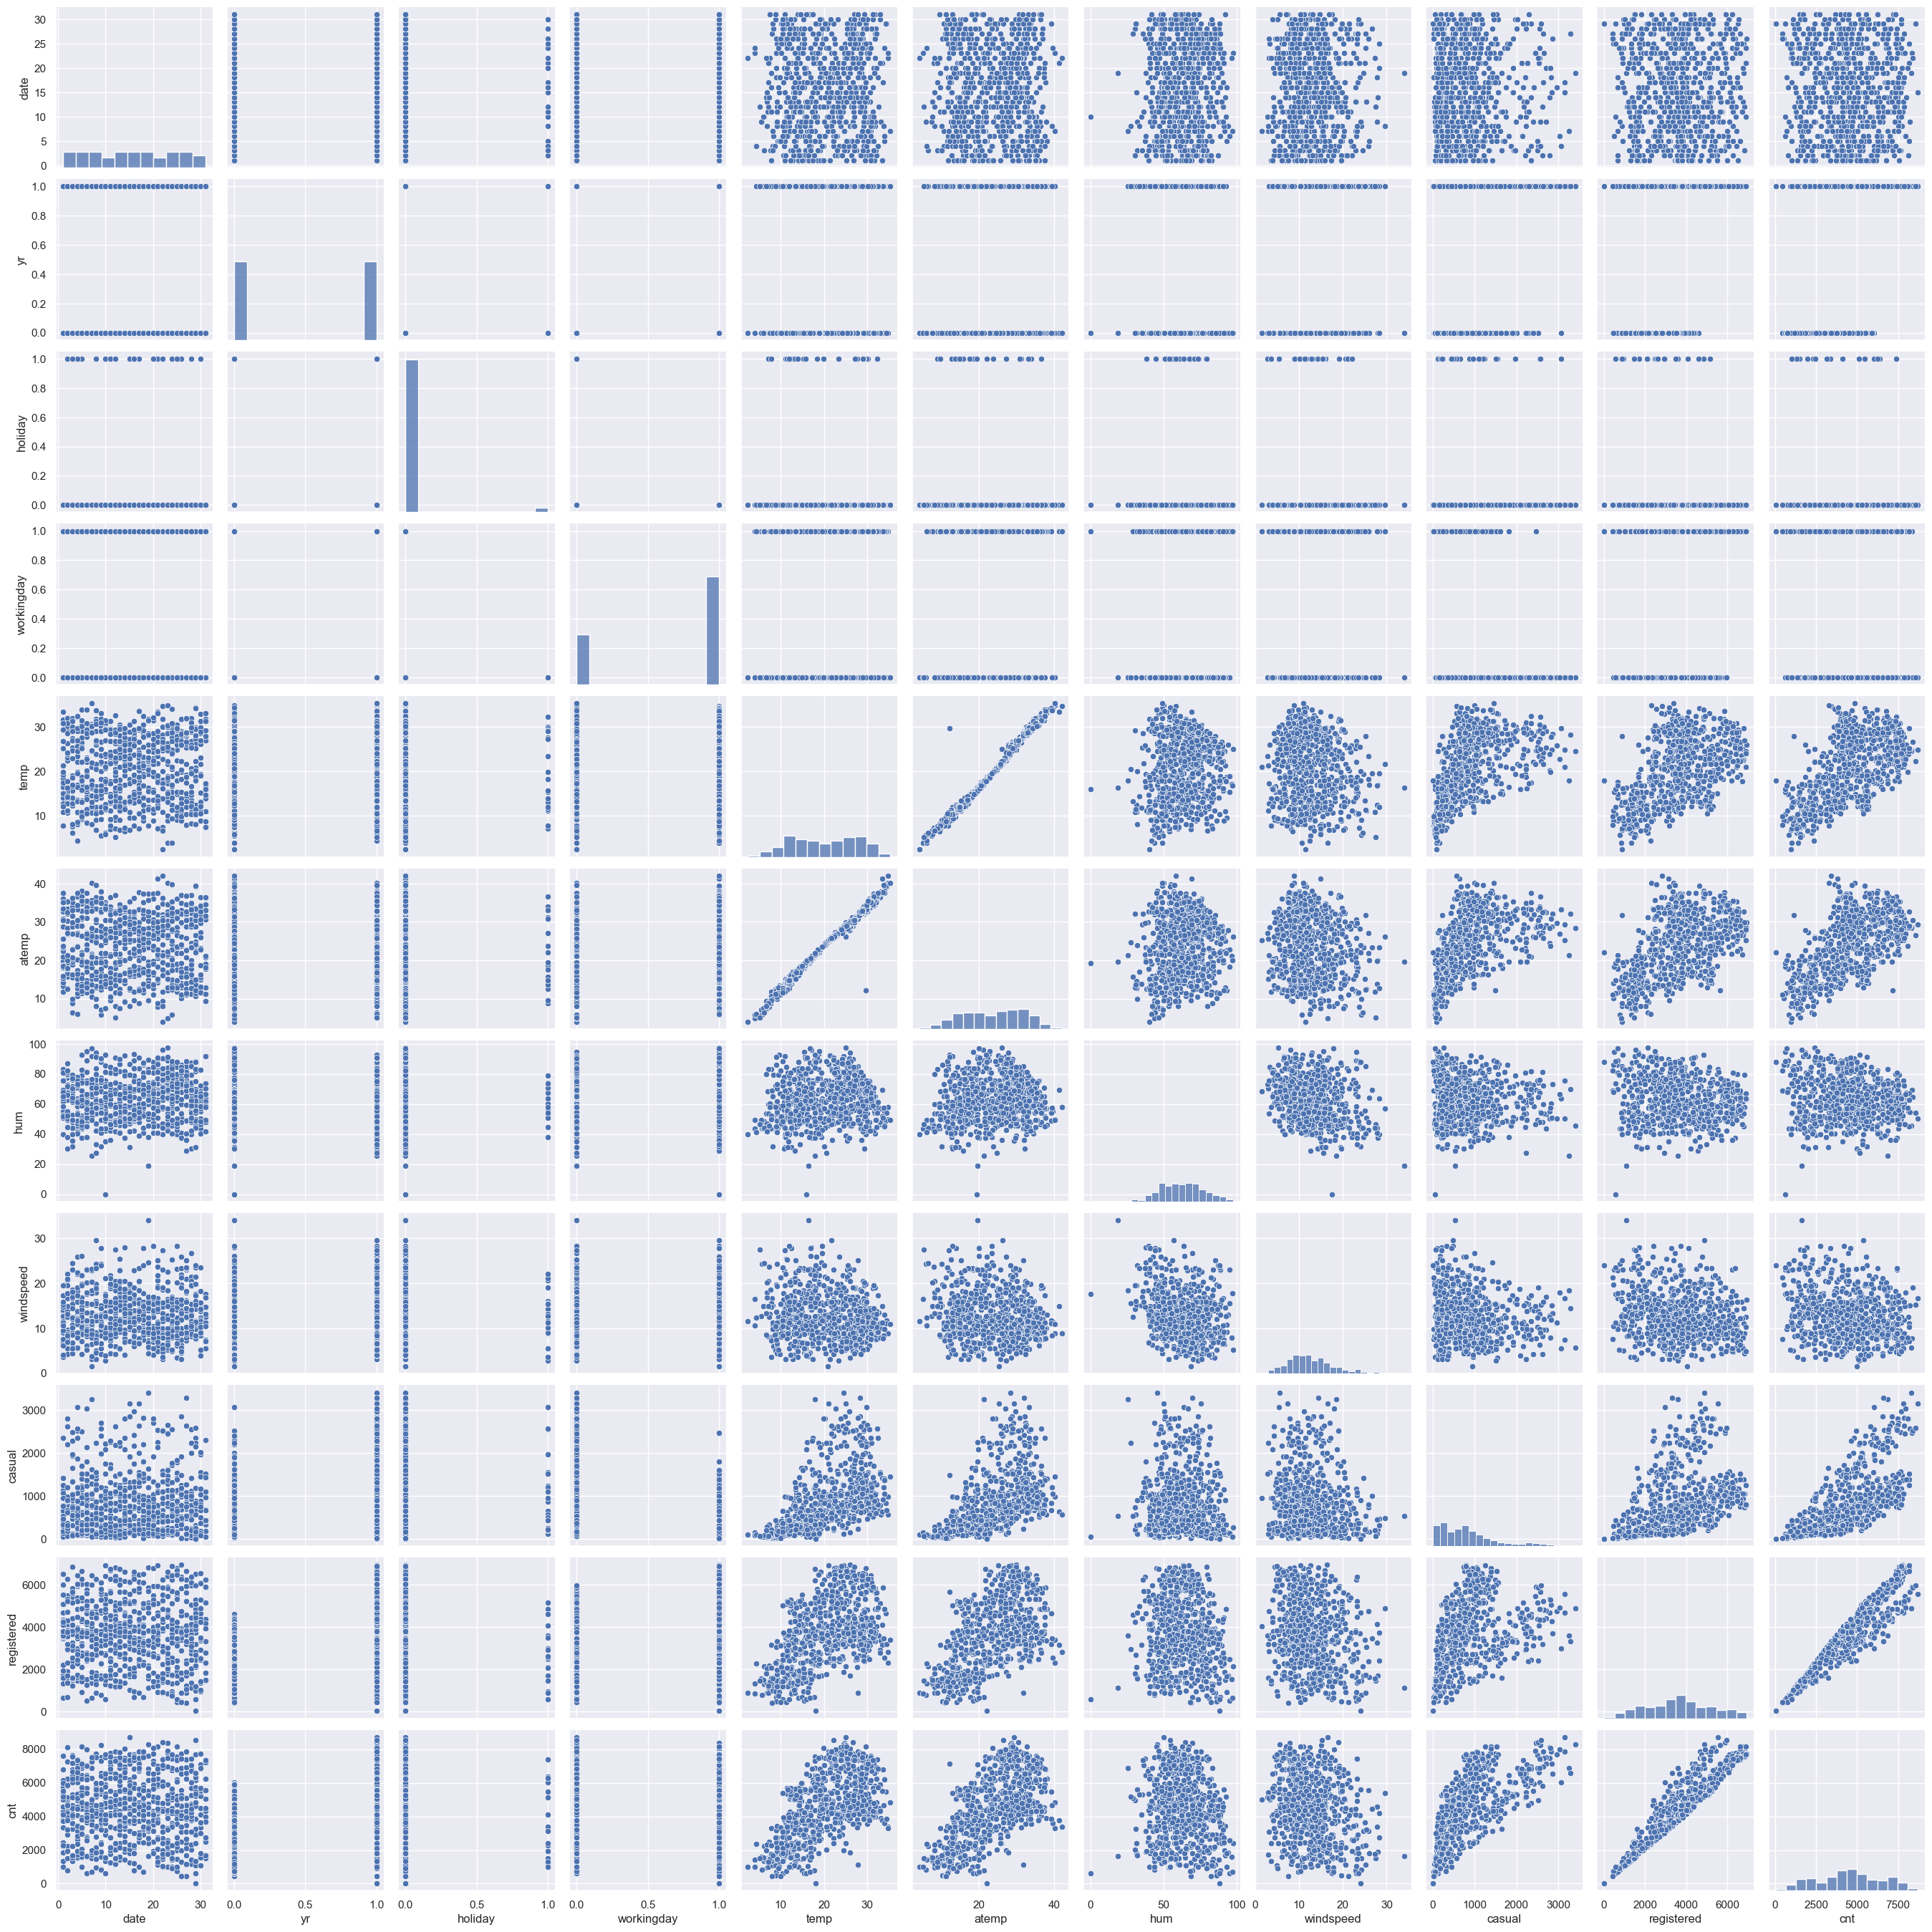

In [26]:
sns.pairplot(df)
plt.show()

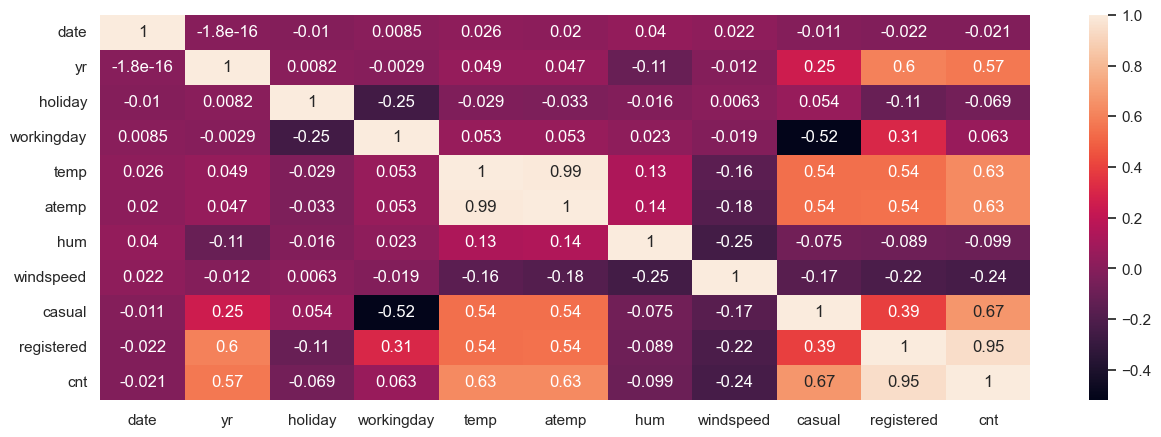

In [27]:
cor=df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(cor, annot = True)
plt.show()

In [28]:
category_col = ['mnth', 'season', 'weekday', 'weathersit']
dummy_col = pd.get_dummies(df[category_col], drop_first=True)
dummy_col.head(10)

,mnth_Dec,mnth_Nov,mnth_april,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_march,mnth_may,mnth_oct,...,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light,weathersit_mist
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [29]:
df_new = pd.concat([df,dummy_col], axis=1)
df_new = df_new.drop(columns=category_col)

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               730 non-null    int64  
 1   yr                 730 non-null    int64  
 2   holiday            730 non-null    int64  
 3   workingday         730 non-null    int64  
 4   temp               730 non-null    float64
 5   atemp              730 non-null    float64
 6   hum                730 non-null    float64
 7   windspeed          730 non-null    float64
 8   casual             730 non-null    int64  
 9   registered         730 non-null    int64  
 10  cnt                730 non-null    int64  
 11  mnth_Dec           730 non-null    uint8  
 12  mnth_Nov           730 non-null    uint8  
 13  mnth_april         730 non-null    uint8  
 14  mnth_feb           730 non-null    uint8  
 15  mnth_jan           730 non-null    uint8  
 16  mnth_july          730 non

In [34]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_new, test_size=0.3, random_state=100)

In [35]:
print("shape of traing data", df_train.shape)
print("shape of test data", df_test.shape)

shape of traing data (511, 33)
shape of test data (219, 33)


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [37]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.describe()

,date,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light,weathersit_mist
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,15.592955,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,837.798434,3653.504892,...,0.246575,0.248532,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.344423
std,8.903110,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,675.283665,1582.305824,...,0.431440,0.432585,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.475645
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,312.000000,2472.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,701.000000,3658.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,1075.500000,4850.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3283.000000,6946.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


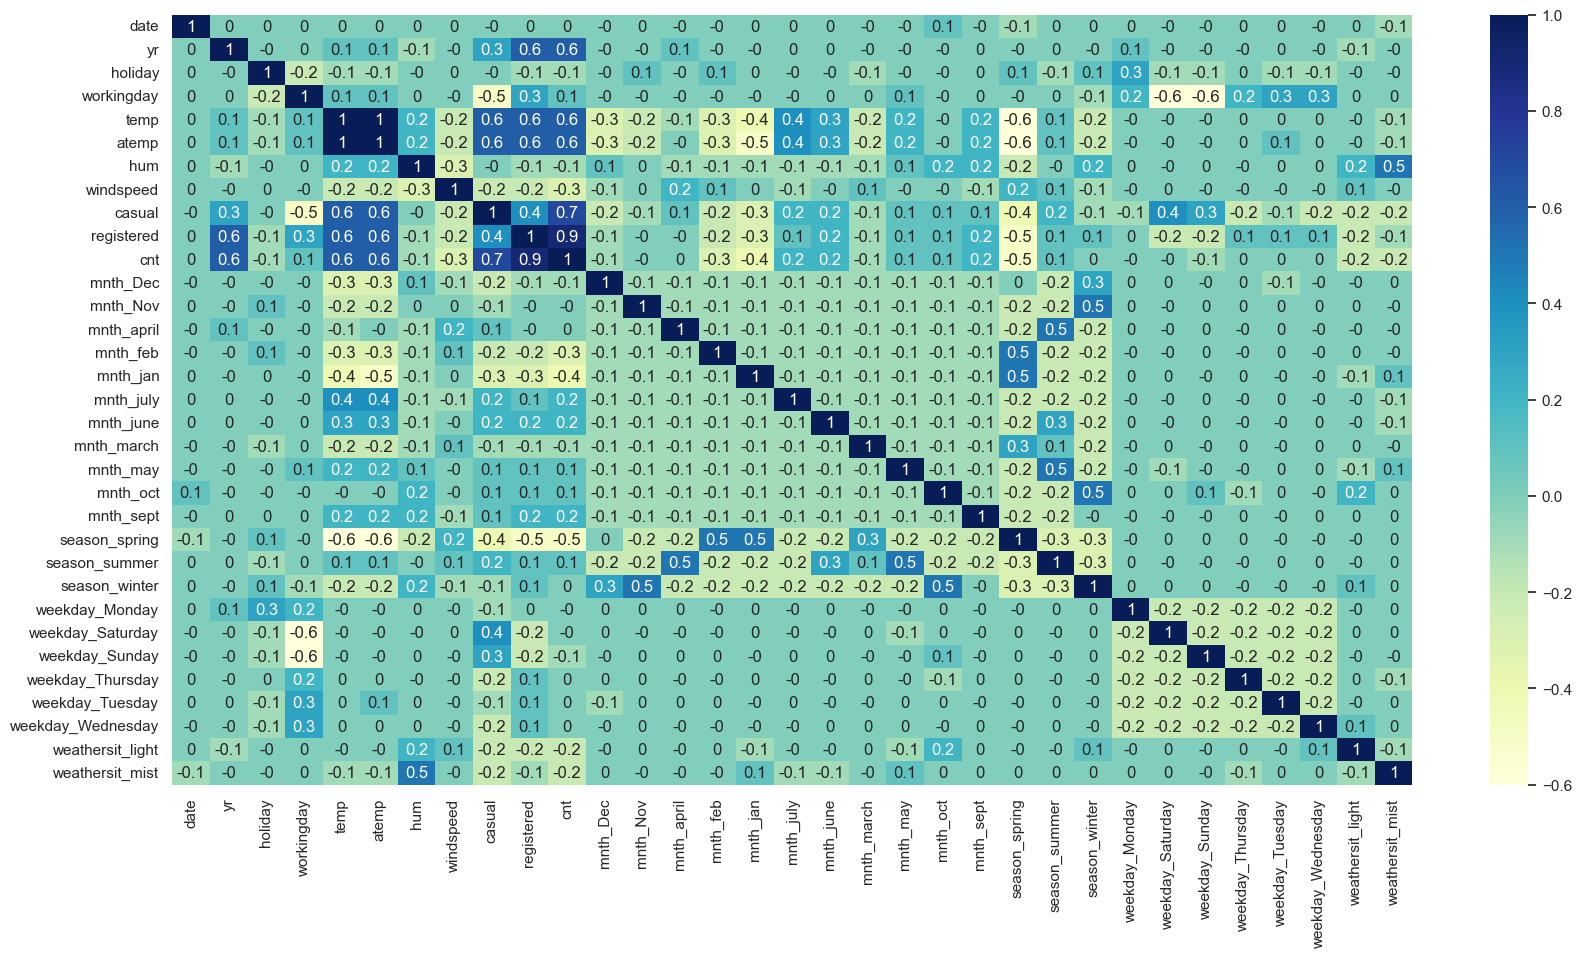

In [39]:
plt.figure(figsize = (20, 10))
sns.heatmap(round(df_train.corr(),1), annot = True, cmap="YlGnBu")
plt.show()

In [40]:
y_train = df_train.pop('cnt')
X_train = df_train

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [43]:
from sklearn.feature_selection import RFE
rfe = RFE(lr,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [44]:
rfe_df = pd.DataFrame({'feature': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,feature,Select Status,Ranking
9,registered,True,1
19,mnth_oct,True,1
30,weathersit_light,True,1
14,mnth_jan,True,1
21,season_spring,True,1
12,mnth_april,True,1
29,weekday_Wednesday,True,1
17,mnth_march,True,1
18,mnth_may,True,1
7,windspeed,True,1


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def print_vif(cols):
    df1 = X_train[cols]
    vif_df = pd.DataFrame()
    vif_df['Features'] = df1.columns
    vif_df['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'],2)
#return vif_df
print(vif_df.sort_values(by='VIF',ascending=False))

In [47]:
import statsmodels.api as sm
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("..")
print_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.221e+30
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:46:11   Log-Likelihood:                 16845.
No. Observations:                 511   AIC:                        -3.366e+04
Df Residuals:                     495   BIC:                        -3.359e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0025   4.19e-1

In [49]:
col = col.drop(['workingday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("...")
print_vif(col)

KeyError: "['workingday'] not found in axis"

In [50]:
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print(".")
print_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.016e+31
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:51:16   Log-Likelihood:                 17720.
No. Observations:                 511   AIC:                        -3.541e+04
Df Residuals:                     496   BIC:                        -3.535e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0025   4.97e-1

In [51]:
col = col.drop(['temp'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("....")
print_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.111e+31
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:52:30   Log-Likelihood:                 17372.
No. Observations:                 511   AIC:                        -3.472e+04
Df Residuals:                     497   BIC:                        -3.466e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0025   9.78e-1

In [52]:
col = ['yr', 'holiday', 'windspeed',  'mnth_sept', 'season_spring',
       'season_summer', 'season_winter', 'weekday_Sunday', 'weathersit_light',
       'weathersit_mist','temp']
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("**")
print_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          1.19e-189
Time:                        19:53:44   Log-Likelihood:                 504.36
No. Observations:                 511   AIC:                            -984.7
Df Residuals:                     499   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1975      0.029  

In [53]:
y_train_pred = lr_model.predict(X_train_sm)

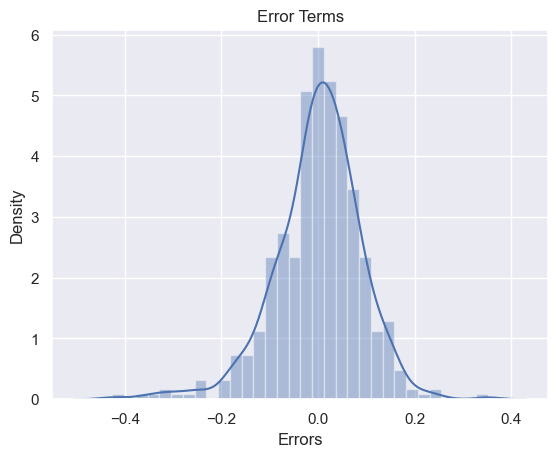

In [54]:
sns.distplot(y_train - y_train_pred)
plt.title('Error Terms')                  
plt.xlabel('Errors')  
plt.show()

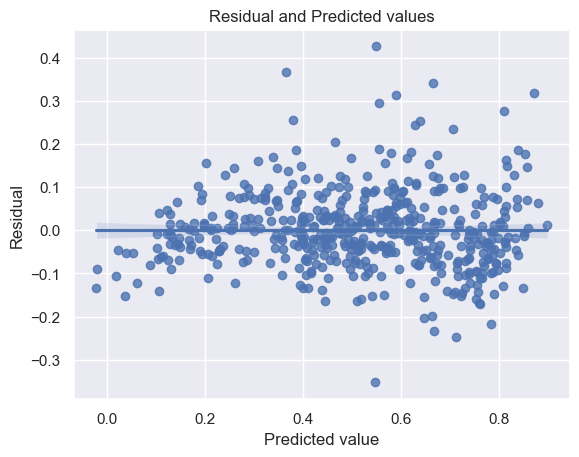

In [55]:
residual= y_train_pred - y_train 
sns.regplot(x= y_train_pred, y=residual)
plt.title("Residual and Predicted values")
plt.xlabel("Predicted value")
plt.ylabel("Residual")
plt.show()

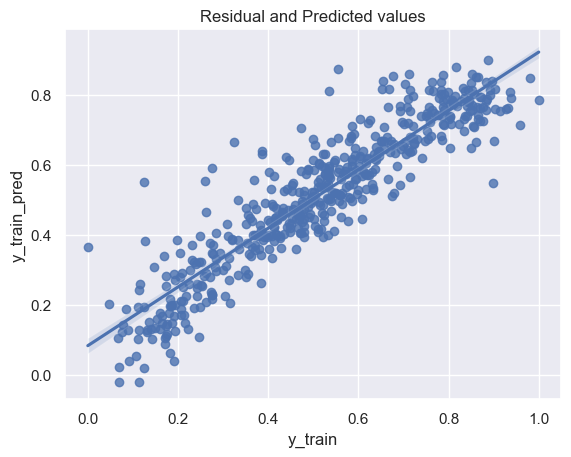

In [56]:
sns.regplot(x= y_train, y=y_train_pred)
plt.title("Residual and Predicted values")
plt.xlabel("y_train")
plt.ylabel("y_train_pred")
plt.show()

In [57]:
num_vars =['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [58]:
y_test = df_test.pop('cnt')
X_test = df_test

In [59]:
col = ['yr', 'holiday', 'windspeed',  'mnth_sept', 
       'season_summer', 'season_winter', 'weekday_Sunday', 'weathersit_light',
       'weathersit_mist','temp']
X_test_sm = X_test[col]


In [ ]:
y_pred = lr_model.predict(X_test_sm)